# Ejercicio 3 (tema 2)

Calcular el polinomio de de Lagrange que interpola los valores $\{1, -4, 8, -16\}$ en los nodos $\{0.1, 0.2, 0.4, 0.8\}$. Usar:
1.- La implementación `lagrange`, incluída en módulo `scipy.interpolate` de  *Python*.
2.- La fórmula de Lagrange
3.- La fórmula de Newton (diferencias divididas)

En los últimos casos, comparar los resultados con los obtenidos por la función `lagrange` del módulo `scipy.interpolate`)

In [1]:
# En este ejemplo, cargamos las funciones habituales de numpy y matplotlib 
# en el espacio de nombres actual y usamos Python 2.x (habrá errores si se usa python 3):
%pylab inline

Populating the interactive namespace from numpy and matplotlib


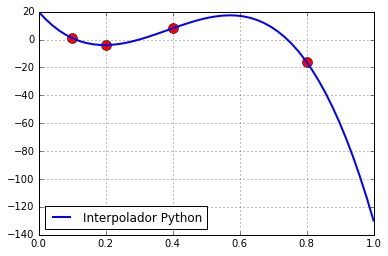

In [7]:
#
# 1. Cargamos los datos y definimos el polinomio de lagrange
#    mediante la función incorporda en python
#

n = 3 # Grado del polinomio
x0, x1, x2, x3 = 0.1, 0.2, 0.4, 0.8
y0, y1, y2, y3 = 1, -4, 8, -16
nodos = [x0, x1, x2, x3]
valores = [y0, y1, y2, y3]
plot(nodos, valores, 'o', c='red', markersize=10) # Pintar un punto gordo en cada nodo

from scipy.interpolate import lagrange
p = lagrange(nodos, valores) # p = polinomio de interpolación

a, b = 0, 1
x = linspace(a, b) # Vector con muchos puntos equiespaciados
plot(x, p(x), c='blue', linewidth=2, label="Interpolador Python");
legend(loc='best')
grid()

### Fórmula de Lagrange

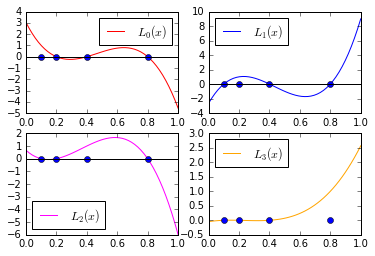

In [3]:
# Funciones base de Lagrange asociadas a los nodos anteriores: 
def L0(x): return (x-x1)*(x-x2)*(x-x3)/((x0-x1)*(x0-x2)*(x0-x3))
def L1(x): return (x-x0)*(x-x2)*(x-x3)/((x1-x0)*(x1-x2)*(x1-x3))
def L2(x): return (x-x0)*(x-x1)*(x-x3)/((x2-x0)*(x2-x1)*(x2-x3))
def L3(x): return (x-x0)*(x-x1)*(x-x2)/((x3-x0)*(x3-x1)*(x3-x2))

# Como curiosidad, podemos dibujar las funciones base de Lagrange:
x = linspace(a, b)
funciones_base = [L0, L1, L2, L3]
colores = ['red', 'blue', 'magenta', 'orange']
labels = ["$L_0(x)$", "$L_1(x)$", "$L_2(x)$", "$L_3(x)$"]
for i in range(4):
    axhline(c='k'); axvline(c='k'); # Dibujar ejes
    subplot(2, 2, i+1) # Posición en una matriz 2x2 (1 = esquina sup izqda)
    f = funciones_base[i] # Función a dibujar
    plot(x, f(x), c=colores[i], label=labels[i]) # Pintar la función
    plot(nodos, [0,0,0,0], 'o') # Dibujar los nodos en el eje X (y=0)
    legend(loc='best') # Mostrar las leyendas

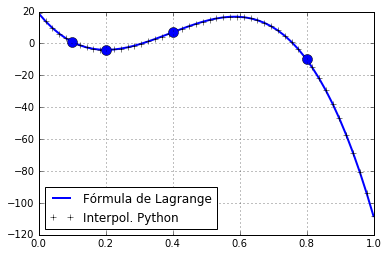

In [4]:
# Polinomio de interpolación construído mediante la fórmula de Lagrange:
def p_lagrange(x):
    return y0*L0(x) + y1*L1(x) + y2*L2(x) + y3*L3(x)

# Dibujamos el polinomio resultante
plot(x, p_lagrange(x), lw=2, c='blue', label=u"Fórmula de Lagrange")

# Comparamos con el polinomio de Python (ponemos cruces para distinguirlo)
plot(x, p(x), '+', c='black', label="Interpol. Python")

# Dibujamos los nodos y terminamos
plot(nodos, valores, 'o', markersize=10)
legend(loc='best')
grid()

Como se puede apreciar en la gráfica anterior, el polinomio de interpolación de Lagrange que hemos construído coincide con el resultado obtenido mediante la función `lagrange` de *Python*

### Fórmula de Newton (diferencias divididas)

In [5]:
n = 3 # Grado del polinomio

# Diferencias de orden 0:
dif0 = valores
print "dif0 =", dif0

# Diferencias de orden 1:
dif1 = [ (dif0[k+1]-dif0[k])/(nodos[k+1]-nodos[k]) for k in range(n) ]
print "dif1 =", dif1

# Diferencias de orden 2:
dif2 = [ (dif1[k+1]-dif1[k])/(nodos[k+2]-nodos[k]) for k in range(0,n-1) ]
print "dif2 =", dif2

# Diferencias de orden 3:
dif3 = [ (dif2[k+1]-dif2[k])/(nodos[k+3]-nodos[k]) for k in range(0,n-2) ]
print "dif3 =", dif3

dif0 = [1, -4, 7, -10]
dif1 = [-50.0, 55.0, -42.5]
dif2 = [349.99999999999994, -162.49999999999997]
dif3 = [-732.1428571428569]


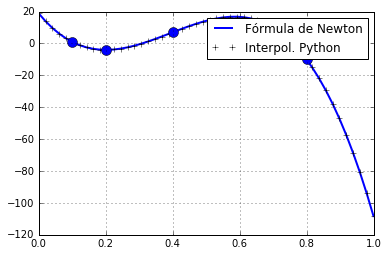

In [6]:
def p_newton(x):
    return dif0[0] + (x-x0)*dif1[0] + (x-x0)*(x-x1)*dif2[0] + (x-x0)*(x-x1)*(x-x2)*dif3[0]

# Dibujamos el polinomio resultante
plot(x, p_newton(x), lw=2, c='blue', label=u"Fórmula de Newton")

# Comparamos con el polinomio de Python (ponemos cruces para distinguirlo)
plot(x, p(x), '+', c='black', label="Interpol. Python")

# Dibujamos los nodos y terminamos
plot(nodos, valores, 'o', markersize=10)
legend()
grid()

De nuevo, el polinomio que hemos construído coincide con el resultado obtenido mediante la función `lagrange` de *Python*.